# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [11]:
df = pd.read_csv("nyc_taxi_data.csv.gz",nrows=10000000,compression="gzip")
#Cleaning data
df.dropna(axis=0,how="any",inplace=True)
passengerZero = df[df["passenger_count"] == 0].index
df.drop(passengerZero,inplace=True)
tripDistanceZero = df[df["trip_distance"] == 0].index
df.drop(tripDistanceZero,inplace=True)
incorrectRateCode = df[~df["rate_code"].isin([1,2,3,4,5,6])].index
df.drop(incorrectRateCode,inplace=True)
# add pickup hours columns to represent the datetime data rows
pickupHours = df["pickup_datetime"].str[11:13].astype("int64")
pickupHoursDf = pd.DataFrame({"pickupHours":pickupHours})
df = pd.concat([df,pickupHoursDf],axis=1)

<Axes: xlabel='pickupHours', ylabel='tip_amount'>

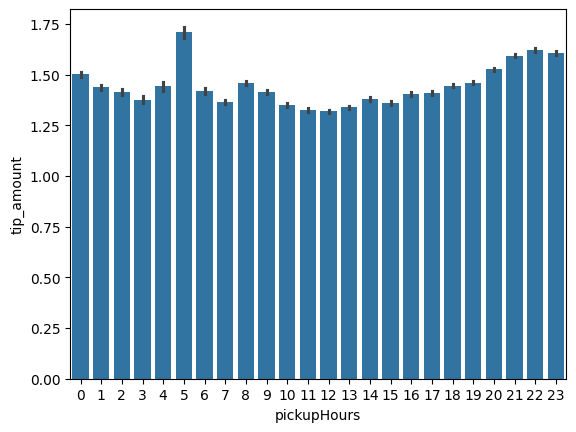

In [12]:
#Visualization
df.sort_values("pickupHours",inplace=True)
sns.barplot(x=df['pickupHours'],y=df['tip_amount'])


<Axes: xlabel='passenger_count', ylabel='tip_amount'>

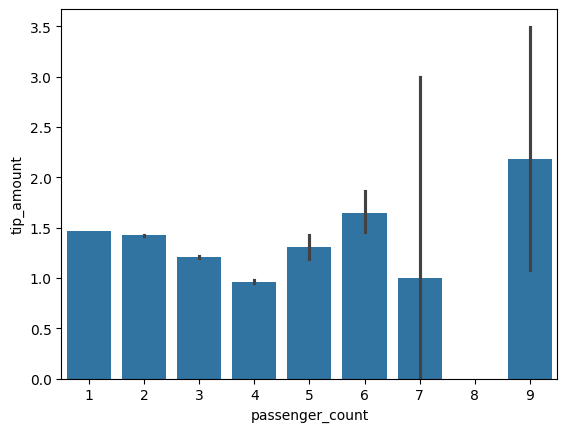

In [13]:
sns.barplot(x='passenger_count',y='tip_amount',data=df)

<Axes: xlabel='trip_distance', ylabel='tip_amount'>

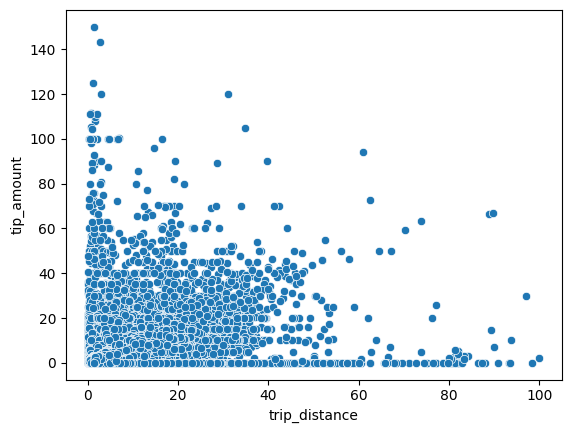

In [14]:
sns.scatterplot(x='trip_distance',y='tip_amount',data=df)

<Axes: xlabel='rate_code', ylabel='tip_amount'>

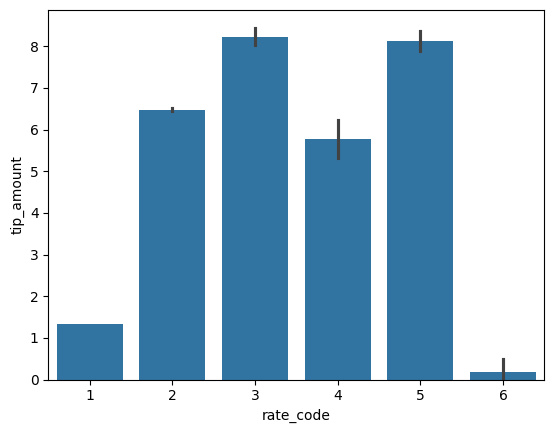

In [16]:
# The final rate code in effect at the end of the trip. 
# 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride# 
sns.barplot(x='rate_code',y='tip_amount',data=df)

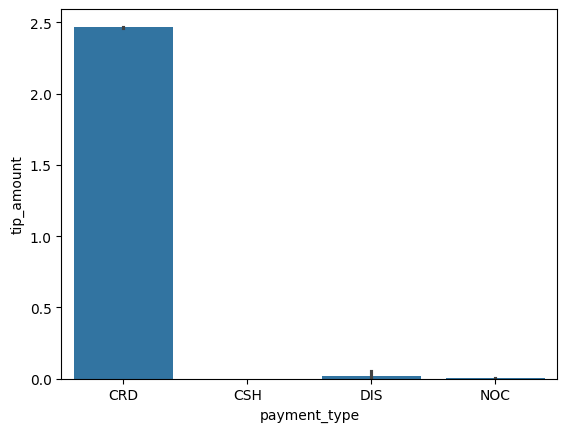

In [18]:
b = sns.barplot(x='payment_type',y='tip_amount',data=df)

In [17]:
# a lot of tips from paying with cash were not recorded
listval=(df[(df["payment_type"] == "CSH") & (df["tip_amount"]>0)]).index.tolist()
df.loc[listval]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickupHours
1653855,CMT,2014-01-14 00:16:38,2014-01-14 00:16:33,1,7.7,0.000000,0.000000,1,N,-73.988056,40.720780,CSH,25.5,0.5,0.5,2.0,0.0,28.5,0
5826835,CMT,2014-01-04 00:48:44,2014-01-04 01:04:01,1,1.5,-73.969494,40.754461,1,N,-73.987150,40.760877,CSH,8.0,0.5,0.5,1.8,0.0,10.8,0
5585535,CMT,2014-01-01 01:50:23,2014-01-01 02:01:09,2,1.7,-73.981256,40.725016,1,N,-73.993909,40.741078,CSH,9.0,0.5,0.5,3.0,0.0,13.0,1
5655490,CMT,2014-01-02 01:03:49,2014-01-02 01:03:49,1,7.2,-73.992671,40.718767,1,N,-73.992671,40.718767,CSH,23.5,0.5,0.5,4.9,0.0,29.4,1
527780,CMT,2014-01-07 01:18:42,2014-01-07 01:51:12,1,17.2,-73.871062,40.773837,4,N,-73.704508,40.620802,CSH,58.5,0.5,0.5,37.5,0.0,97.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659257,CMT,2014-01-30 23:07:14,2014-01-30 23:12:45,1,0.4,-73.976140,40.759418,1,N,-73.969780,40.756963,CSH,4.0,0.5,0.5,1.0,0.0,6.0,23
808846,CMT,2014-01-09 23:21:28,2014-01-10 00:01:09,1,26.6,-74.016512,40.704947,1,N,-74.016512,40.704947,CSH,69.5,0.5,0.5,10.0,0.0,80.5,23
7601085,CMT,2014-01-29 23:21:11,2014-01-30 00:00:17,1,11.1,-73.953816,40.775242,1,N,-73.960505,40.711812,CSH,34.5,0.5,0.5,7.1,0.0,42.6,23
824004,CMT,2014-01-09 23:30:18,2014-01-09 23:55:32,2,6.6,-73.986229,40.758006,5,Y,-74.033357,40.717147,CSH,60.0,0.0,0.0,18.0,0.0,78.0,23


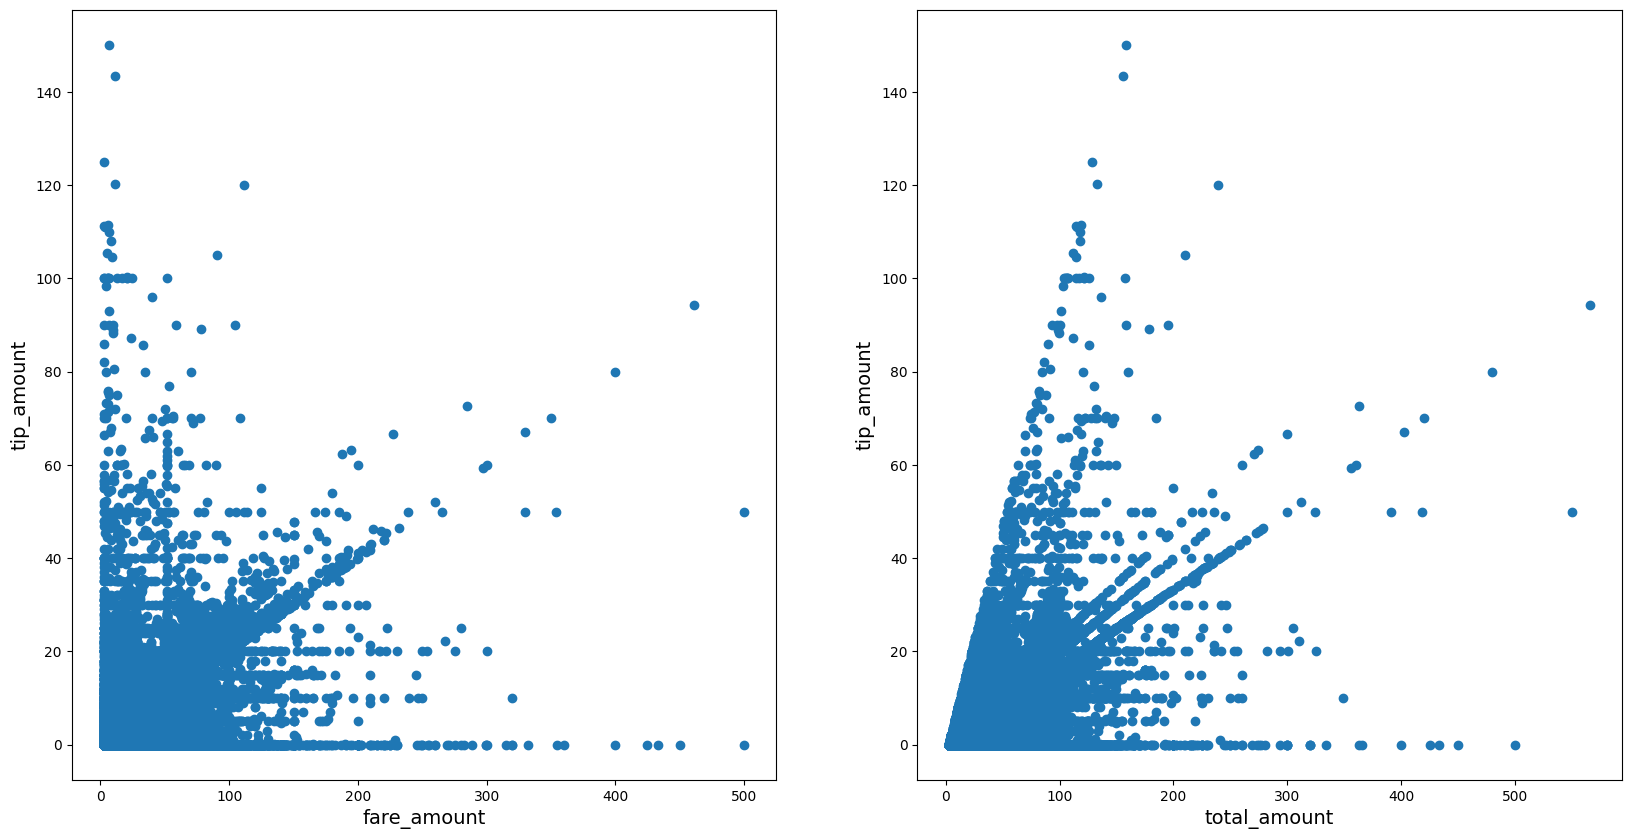

In [ ]:
num_cols=['fare_amount','total_amount']
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
count=0
for col in ax:
    if(count<len(num_cols)):
      col.set_xlabel(num_cols[count], fontsize=14)
      col.set_ylabel("tip_amount", fontsize=14)
      col.plot(df[num_cols[count]], df["tip_amount"],"o")
    count+=1
plt.show()

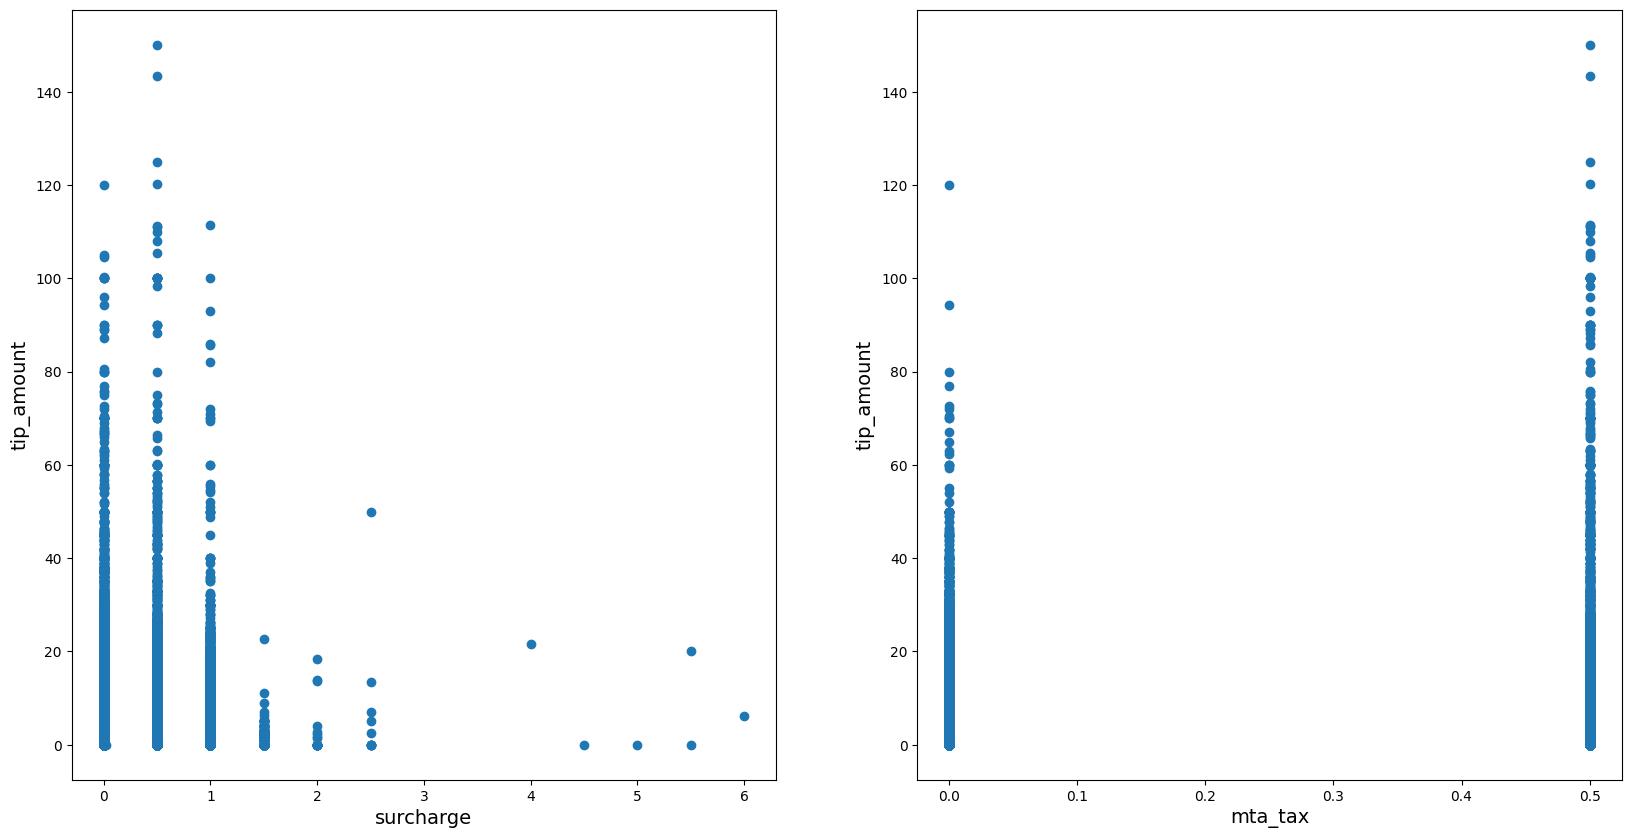

In [ ]:
num_cols=['surcharge','mta_tax']
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,10))
count=0
for col in ax:
    if(count<len(num_cols)):
      col.set_xlabel(num_cols[count], fontsize=14)
      col.set_ylabel("tip_amount", fontsize=14)
      col.plot(df[num_cols[count]], df["tip_amount"],"o")
    count+=1
plt.show()

<Axes: xlabel='tolls_amount', ylabel='tip_amount'>

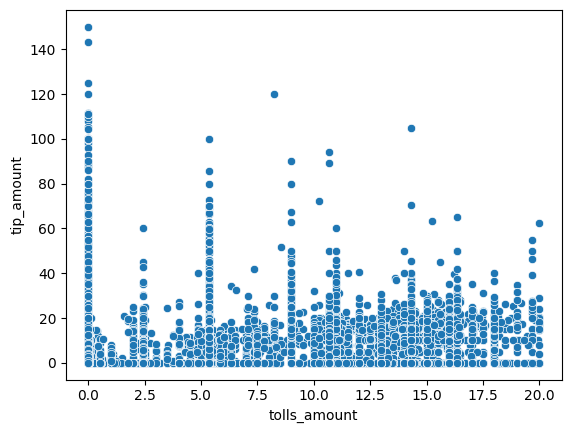

In [ ]:
#people are more likely to use card if the total cost is higher and tolls increase total cost
sns.scatterplot(x='tolls_amount',y='tip_amount',data=df)

<Axes: >

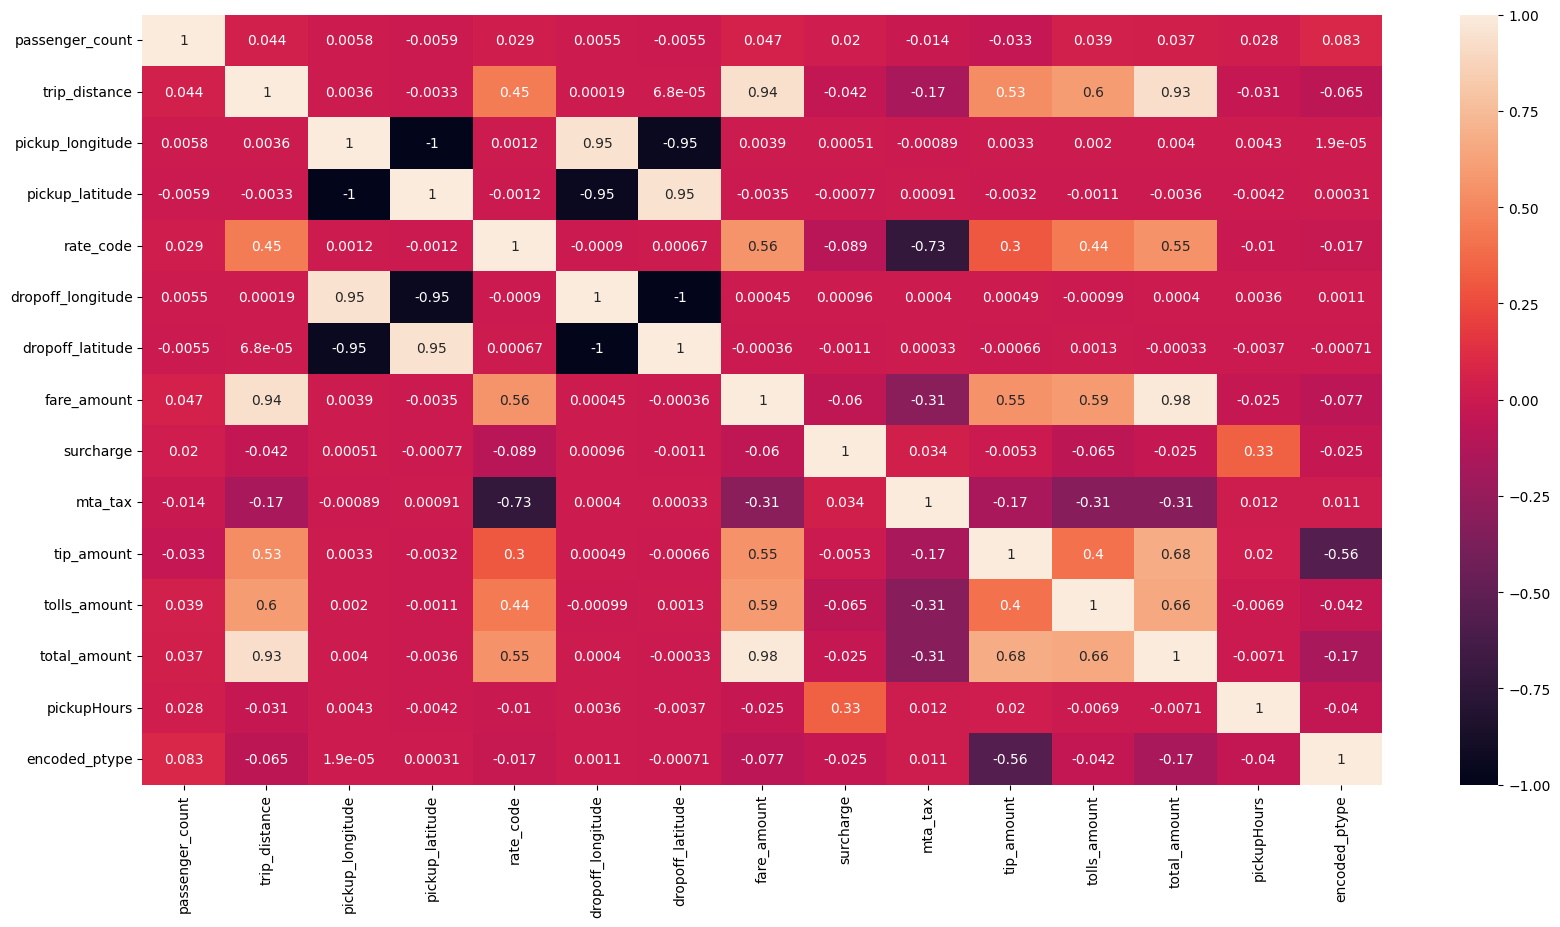

In [21]:
#encoding categorical variables to see possible correlations
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["encoded_ptype"] = encoder.fit_transform(df["payment_type"])
df1 = df.select_dtypes(include=np.number)
df1c = df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df1c, vmin = -1, vmax = 1, annot=True)

# Model training

In [ ]:
#Features using: payment_type, fare_amount, trip_distance, rate_code
